#Library and functions

In [ ]:
#--- Reproductibility ---
%env PYTHONHASHSEED=0
from numpy.random import seed
seed(42)
from tensorflow import keras
keras.utils.set_random_seed(42)
import tensorflow as tf
tf.config.experimental.enable_op_determinism()

#---
import numpy as np
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from collections import Counter
import PIL
import glob
from tqdm import tqdm
import networkx as nx

#Graphics
from scipy.stats import gaussian_kde
from scipy.stats import norm
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from keras.preprocessing import image

#NN
from tensorflow.keras import layers, callbacks, Input
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50

#sklearn modules: evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, root_mean_squared_error

#Recurrence plots
from pyts.image import RecurrencePlot
from pyts.datasets import load_gunpoint
from mpl_toolkits.axes_grid1 import ImageGrid

In [ ]:
def _load_image(img_path):
  img = image.load_img(img_path, target_size=(100, 100))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  return img

# Neural net training: regression

##Architecture

In [ ]:
model = keras.Sequential([
  keras.layers.Conv2D(3, 4, activation='relu'),
  keras.layers.Conv2D(3, 4, activation='relu'),
  keras.layers.AveragePooling2D(2),
  keras.layers.Conv2D(3, 4, activation='relu'),
  keras.layers.Conv2D(3, 4, activation='relu'),
  keras.layers.AveragePooling2D(2),
  keras.layers.Conv2D(3, 4, activation='relu'),
  keras.layers.Conv2D(3, 4, activation='relu'),
  keras.layers.AveragePooling2D(2),
  keras.layers.Conv2D(3, 4, activation='relu'),
  keras.layers.Conv2D(3, 4, activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(units=1024, activation='relu'),
  keras.layers.Dense(units=512, activation='relu'),
  keras.layers.Dense(units=256, activation='relu'),
  keras.layers.Dense(units=128, activation='relu'),
  keras.layers.Dense(units=64, activation='relu'),
  keras.layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer="adam")

## Training

In [ ]:
#Read all pngs from the train set
data_path = '/your/path/'
pngs = glob.glob(data_path + 'delta_*/*png')

ims = {}
for png in pngs:
  ims[png]=np.array(PIL.Image.open(png).convert('L'))

In [ ]:
#Questions = images
#Solutions = a parameter that generated that image

questions = np.array([each for each in ims.values()]).astype(np.float32)
solutions = np.array([float(each.split('_')[-1].split('.')[0].split('/')[1])/(1e16) for each in ims]).astype(np.float32)

In [ ]:
N_size = 100

#Train/test split (gnuplot data):
X_train, X_test, y_train, y_test = train_test_split(questions, solutions, test_size=0.3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(ims, solutions, test_size=0.3, random_state=42)

X_train = X_train.reshape(-1, N_size, N_size, 1)
X_test = X_test.reshape(-1, N_size, N_size, 1)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

2025-02-20 11:35:25.625294: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
2025-02-20 11:35:26.330823: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.


Epoch 1/300


2025-02-20 11:35:26.847231: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
I0000 00:00:1740062129.335946   64540 service.cc:145] XLA service 0x7f987c029bb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740062129.335976   64540 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 11:35:29.409746: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 11:35:29.670784: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 14/280 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2422

I0000 00:00:1740062131.860307   64540 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_6', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1740062131.864028   64540 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0522 - val_loss: 0.0036
Epoch 2/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 3/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 4/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 5/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 6/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 7/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 8/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 9/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 10/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 11/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 12/300
280/280 ━━━━━━━━━━━━━━━━━━━━

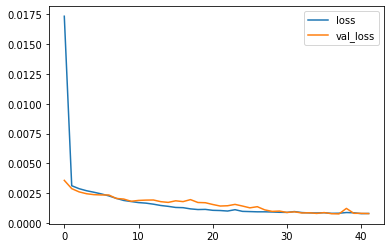

In [ ]:
#0<k<1
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Epoch 1/300


I0000 00:00:1740055491.183597   15450 service.cc:145] XLA service 0x7fbabc004830 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740055491.183632   15450 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 09:44:51.246895: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 09:44:51.531849: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 13/281 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.1261

I0000 00:00:1740055493.683847   15450 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_6', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1740055493.688015   15450 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2768

I0000 00:00:1740055498.808164   15450 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_5', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_4', 8 bytes spill stores, 8 bytes spill loads



281/281 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 0.2762 - val_loss: 0.0413
Epoch 2/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0296 - val_loss: 0.0184
Epoch 3/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0173 - val_loss: 0.0156
Epoch 4/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0135 - val_loss: 0.0141
Epoch 5/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0115 - val_loss: 0.0107
Epoch 6/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 7/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 8/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0084 - val_loss: 0.0092
Epoch 9/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0081 - val_loss: 0.0082
Epoch 10/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0077 - val_loss: 0.0080
Epoch 11/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0074 - val_loss: 0.0075
Epoch 12/300
281/281 ━━━━━━━━━━━━━━━━━━━━

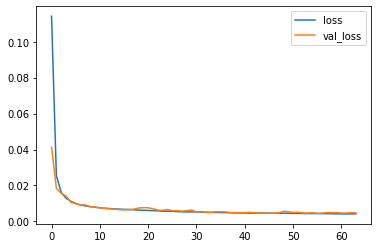

In [ ]:
#0<k<2
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

2024-09-24 17:48:49.501120: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
2024-09-24 17:48:50.172873: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.


Epoch 1/300


2024-09-24 17:48:50.690067: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
I0000 00:00:1727210933.424767   76524 service.cc:145] XLA service 0x7f64b4002020 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727210933.424802   76524 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2024-09-24 17:48:53.510846: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-24 17:48:53.771418: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 15/280 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2093

I0000 00:00:1727210935.966647   76524 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0463 - val_loss: 0.0049
Epoch 2/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 3/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 4/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 5/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 6/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 7/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0013 - val_loss: 0.0048
Epoch 8/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch 9/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 10/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 11/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 7.3932e-04 - val_loss: 0.0014
Epoch 12/300
280/280 ━━━━━━━━━━━━━━━━

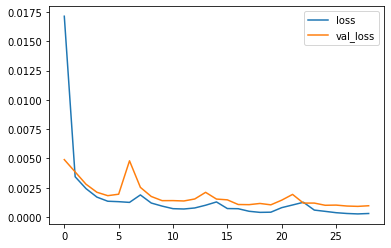

In [ ]:
#--- ORDER 1E5, 0<k<1 ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

2024-09-24 17:42:35.702272: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
2024-09-24 17:42:36.366735: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.


Epoch 1/300


2024-09-24 17:42:36.873564: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
I0000 00:00:1727210559.634035   73381 service.cc:145] XLA service 0x7f43f4018470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727210559.634080   73381 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2024-09-24 17:42:39.714957: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-24 17:42:39.965065: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 16/280 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2216

I0000 00:00:1727210562.195913   73381 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0439 - val_loss: 0.0031
Epoch 2/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 3/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 4/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 6/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 7/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 8.6535e-04 - val_loss: 0.0014
Epoch 8/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 9.1547e-04 - val_loss: 0.0012
Epoch 9/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 9.9961e-04 - val_loss: 0.0013
Epoch 10/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 9.1503e-04 - val_loss: 0.0011
Epoch 11/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 6.6217e-04 - val_loss: 0.0010
Epoch 12/300
280/280 

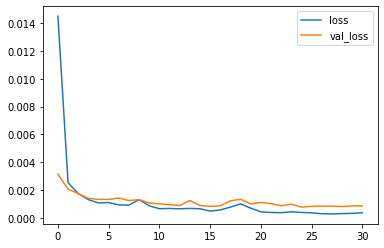

In [ ]:
#--- ORDER 1E3, 0<k<1 ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
#--- ORDER 1E6, 0<k<1 ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

2024-09-24 17:55:11.847862: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
2024-09-24 17:55:12.489232: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.


Epoch 1/300


2024-09-24 17:55:12.991137: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
I0000 00:00:1727211315.464952   79492 service.cc:145] XLA service 0x7f4fac015af0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727211315.464984   79492 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2024-09-24 17:55:15.518159: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-24 17:55:15.776804: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 16/280 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2140

I0000 00:00:1727211317.899326   79492 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


128/280 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0712

2024-09-24 17:55:46.869739: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
2024-09-24 17:55:47.540456: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.


Epoch 1/300


2024-09-24 17:55:48.058264: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
I0000 00:00:1727211350.599813   79644 service.cc:145] XLA service 0x7f4a80003970 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727211350.599842   79644 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2024-09-24 17:55:50.657881: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-24 17:55:50.932694: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 13/280 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2364

I0000 00:00:1727211353.291528   79644 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0467 - val_loss: 0.0037
Epoch 2/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 3/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 4/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 5/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 6/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 8.5750e-04 - val_loss: 0.0011
Epoch 7/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 8.5296e-04 - val_loss: 9.5409e-04
Epoch 8/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 6.9732e-04 - val_loss: 0.0010
Epoch 9/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 6.3330e-04 - val_loss: 0.0011
Epoch 10/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 6.3877e-04 - val_loss: 0.0015
Epoch 11/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 6.8692e-04 - val_loss: 0.0010
Epoch 12/300


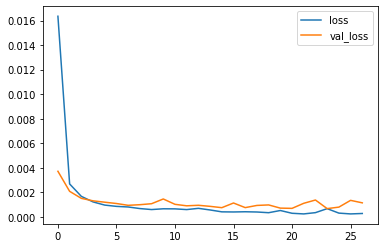

In [ ]:
#--- ORDER 1E7, 0<k<1 ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

2024-09-24 17:05:08.836628: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
2024-09-24 17:05:09.514900: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.


Epoch 1/300


2024-09-24 17:05:10.029328: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
I0000 00:00:1727208312.582878   60377 service.cc:145] XLA service 0x7f3fb4018330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727208312.582913   60377 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2024-09-24 17:05:12.672257: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-24 17:05:12.932503: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 15/280 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2580

I0000 00:00:1727208315.122280   60377 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0577 - val_loss: 0.0039
Epoch 2/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 3/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 4/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 5/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 6/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 7/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 8/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 9/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 10/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 11/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 12/300
280/280 ━━━━━━━━━━━━━━━━━━━━

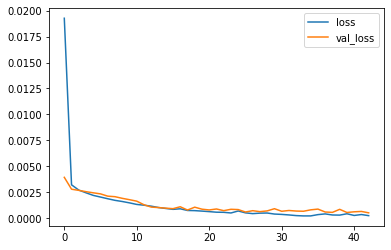

In [ ]:
#--- ORDER 1E8, 0<k<1 ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

2024-09-24 17:39:01.706456: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
2024-09-24 17:39:02.402578: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.


Epoch 1/300


2024-09-24 17:39:02.919635: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
I0000 00:00:1727210345.651995   71415 service.cc:145] XLA service 0x7fb44c018f00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727210345.652023   71415 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2024-09-24 17:39:05.704068: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-24 17:39:05.970075: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 16/280 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2431

I0000 00:00:1727210348.097863   71415 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0505 - val_loss: 0.0033
Epoch 2/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 3/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 4/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 5/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 6/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 7/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 8/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 9/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 11/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 12/300
280/280 ━━━━━━━━━━━━━━━━━━━━

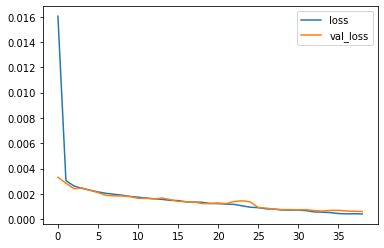

In [ ]:
#--- ORDER 1E9, 0<k<1 ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

2025-02-20 11:42:44.259925: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120080000 exceeds 10% of free system memory.
2025-02-20 11:42:44.979159: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120080000 exceeds 10% of free system memory.


Epoch 1/300


2025-02-20 11:42:45.512945: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120080000 exceeds 10% of free system memory.
I0000 00:00:1740062568.060380   67294 service.cc:145] XLA service 0x7faaf8003ff0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740062568.060402   67294 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 11:42:48.112332: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 11:42:48.373870: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 12/281 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1.1797

I0000 00:00:1740062570.512272   67294 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_6', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1740062570.517782   67294 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3312

I0000 00:00:1740062575.565902   67295 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_5', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_4', 8 bytes spill stores, 8 bytes spill loads



281/281 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - loss: 0.3305 - val_loss: 0.0718
Epoch 2/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0567 - val_loss: 0.0486
Epoch 3/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0426 - val_loss: 0.0376
Epoch 4/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0337 - val_loss: 0.0302
Epoch 5/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0279 - val_loss: 0.0260
Epoch 6/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0236 - val_loss: 0.0259
Epoch 7/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0217 - val_loss: 0.0220
Epoch 8/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0204 - val_loss: 0.0225
Epoch 9/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0194 - val_loss: 0.0201
Epoch 10/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0186 - val_loss: 0.0202
Epoch 11/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0179 - val_loss: 0.0207
Epoch 12/300
281/281 ━━━━━━━━━━━━━━━━━━━━

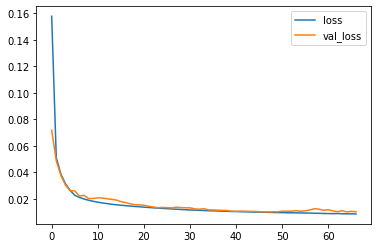

In [ ]:
#--- 5E-3 noise, 0<k<2 ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

2025-02-20 11:48:09.422967: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120080000 exceeds 10% of free system memory.
2025-02-20 11:48:10.165744: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120080000 exceeds 10% of free system memory.


Epoch 1/300


2025-02-20 11:48:10.709089: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120080000 exceeds 10% of free system memory.
I0000 00:00:1740062893.327371   70323 service.cc:145] XLA service 0x7f4a8c014e90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740062893.327412   70323 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 11:48:13.406909: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 11:48:13.660608: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 13/281 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.1707

I0000 00:00:1740062895.790961   70323 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_6', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1740062895.795454   70323 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3361

I0000 00:00:1740062900.949160   70322 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_5', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_4', 8 bytes spill stores, 8 bytes spill loads



281/281 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 0.3355 - val_loss: 0.0772
Epoch 2/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0659 - val_loss: 0.0985
Epoch 3/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0415 - val_loss: 0.0352
Epoch 4/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0307 - val_loss: 0.0453
Epoch 5/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0277 - val_loss: 0.0347
Epoch 6/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0233 - val_loss: 0.0253
Epoch 7/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0206 - val_loss: 0.0205
Epoch 8/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0188 - val_loss: 0.0176
Epoch 9/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0176 - val_loss: 0.0156
Epoch 10/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0165 - val_loss: 0.0147
Epoch 11/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0157 - val_loss: 0.0140
Epoch 12/300
281/281 ━━━━━━━━━━━━━━━━━━━━

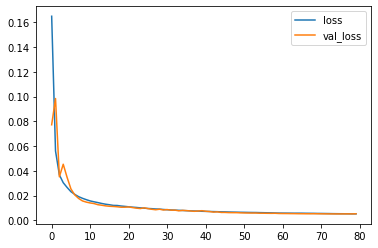

In [ ]:
#--- 1E-3 noise, 0<k<2 ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

2025-02-20 11:54:23.094144: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120080000 exceeds 10% of free system memory.
2025-02-20 11:54:23.769736: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120080000 exceeds 10% of free system memory.


Epoch 1/300


2025-02-20 11:54:24.300727: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120080000 exceeds 10% of free system memory.
I0000 00:00:1740063266.834077   73316 service.cc:145] XLA service 0x7f74b4005060 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740063266.834101   73316 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 11:54:26.895500: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 11:54:27.163401: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 13/281 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.1707

I0000 00:00:1740063269.261304   73316 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_6', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1740063269.267389   73316 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3361

I0000 00:00:1740063274.447954   73316 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_5', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_4', 8 bytes spill stores, 8 bytes spill loads



281/281 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 0.3355 - val_loss: 0.0772
Epoch 2/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0659 - val_loss: 0.0985
Epoch 3/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0415 - val_loss: 0.0352
Epoch 4/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0307 - val_loss: 0.0453
Epoch 5/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0277 - val_loss: 0.0347
Epoch 6/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0233 - val_loss: 0.0253
Epoch 7/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0206 - val_loss: 0.0205
Epoch 8/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0188 - val_loss: 0.0176
Epoch 9/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0176 - val_loss: 0.0156
Epoch 10/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0165 - val_loss: 0.0147
Epoch 11/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0157 - val_loss: 0.0140
Epoch 12/300
281/281 ━━━━━━━━━━━━━━━━━━━━

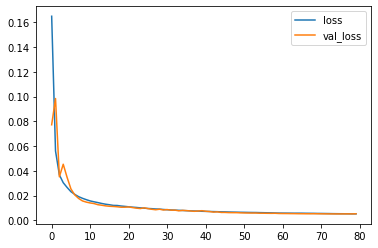

In [ ]:
#--- 1E-1 noise, 0<k<2 ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

##Testing

In [ ]:
data_path = '/your/path/'
test_pngs = glob.glob(data_path + 'test/sample*png')
test_ims = {}

for png in test_pngs:
  test_ims[png]=np.array(PIL.Image.open(png).convert('L'))


#Prepare test questions and solutions as before:
test_questions = np.array([each for each in test_ims.values()]).astype(np.float32)
test_solutions = np.array([float(each.split('_')[-1].split('.')[0].split('/')[2])/(1e16)
                            for each in test_ims]).astype(np.float32)
#test_solutions = np.array([float(each.split('_')[-1].split('.')[0].split('/')[1])/(1e16) for each in test_ims]).astype(np.float32)


#Apply model:
test_answers = model.predict(test_questions)

#Metrics

##Average c and RMSE

In [ ]:
print('=== 1E3 ===')

df_res = pd.read_csv('NN_RP_standardmap_n_100_1E3_K0to1_40k_train_1k_test.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

#--- New metric ---
print('Percentage of predictions within 0.001 precision:', np.sum(df_res['diff_0.001'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.01 precision:', np.sum(df_res['diff_0.01'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.1 precision:', np.sum(df_res['diff_0.1'].values)/len(df_res)*100, '%')

print('---')

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

=== 1E3 ===
Percentage of predictions within 0.001 precision: 5.4 %
Percentage of predictions within 0.01 precision: 38.1 %
Percentage of predictions within 0.1 precision: 99.5 %
---
RMSE: 0.0295


In [ ]:
print('=== 1E5 ===')

df_res = pd.read_csv('NN_RP_standardmap_n_100_1E5_K0to1_40k_train_1k_test.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

#--- New metric ---
print('Percentage of predictions within 0.001 precision:', np.sum(df_res['diff_0.001'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.01 precision:', np.sum(df_res['diff_0.01'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.1 precision:', np.sum(df_res['diff_0.1'].values)/len(df_res)*100, '%')

print('---')

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

=== 1E5 ===
Percentage of predictions within 0.001 precision: 3.3000000000000003 %
Percentage of predictions within 0.01 precision: 35.3 %
Percentage of predictions within 0.1 precision: 98.3 %
---
RMSE: 0.0365


In [ ]:

print('=== 1E6 ===')

df_res = pd.read_csv('NN_RP_standardmap_n_100_1E6_K0to1_40k_train_1k_test.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

#--- New metric ---
print('Percentage of predictions within 0.001 precision:', np.sum(df_res['diff_0.001'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.01 precision:', np.sum(df_res['diff_0.01'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.1 precision:', np.sum(df_res['diff_0.1'].values)/len(df_res)*100, '%')

print('---')

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

=== 1E6 ===
Percentage of predictions within 0.001 precision: 7.6 %
Percentage of predictions within 0.01 precision: 46.9 %
Percentage of predictions within 0.1 precision: 98.0 %
---
RMSE: 0.0347


In [ ]:
print('=== 1E7 ===')

df_res = pd.read_csv('NN_RP_standardmap_n_100_1E7_K0to1_40k_train_1k_test.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

#--- New metric ---
print('Percentage of predictions within 0.001 precision:', np.sum(df_res['diff_0.001'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.01 precision:', np.sum(df_res['diff_0.01'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.1 precision:', np.sum(df_res['diff_0.1'].values)/len(df_res)*100, '%')

print('---')

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

=== 1E7 ===
Percentage of predictions within 0.001 precision: 3.8 %
Percentage of predictions within 0.01 precision: 45.2 %
Percentage of predictions within 0.1 precision: 98.9 %
---
RMSE: 0.0277


In [ ]:
print('=== 1E8 ===')

df_res = pd.read_csv('NN_RP_standardmap_n_100_1E8_K0to1_40k_train_1k_test.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

#--- New metric ---
print('Percentage of predictions within 0.001 precision:', np.sum(df_res['diff_0.001'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.01 precision:', np.sum(df_res['diff_0.01'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.1 precision:', np.sum(df_res['diff_0.1'].values)/len(df_res)*100, '%')

print('---')

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

=== 1E8 ===
Percentage of predictions within 0.001 precision: 4.3999999999999995 %
Percentage of predictions within 0.01 precision: 47.8 %
Percentage of predictions within 0.1 precision: 99.4 %
---
RMSE: 0.0273


In [ ]:
print('=== 1E9 ===')

df_res = pd.read_csv('NN_RP_standardmap_n_100_1E9_K0to1_40k_train_1k_test.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

#--- New metric ---
print('Percentage of predictions within 0.001 precision:', np.sum(df_res['diff_0.001'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.01 precision:', np.sum(df_res['diff_0.01'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.1 precision:', np.sum(df_res['diff_0.1'].values)/len(df_res)*100, '%')

print('---')

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

=== 1E9 ===
Percentage of predictions within 0.001 precision: 1.6 %
Percentage of predictions within 0.01 precision: 21.8 %
Percentage of predictions within 0.1 precision: 98.1 %
---
RMSE: 0.041


In [ ]:
print('=== 0<k<1, 1E8 ===')

df_res = pd.read_csv('NN_RP_standardmap_0to1_no_noise_3x4.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

#--- New metric ---
print('Percentage of predictions within 0.001 precision:', np.sum(df_res['diff_0.001'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.01 precision:', np.sum(df_res['diff_0.01'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.1 precision:', np.sum(df_res['diff_0.1'].values)/len(df_res)*100, '%')

print('---')

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

=== 0<k<1, 1E8 ===
Percentage of predictions within 0.001 precision: 2.3 %
Percentage of predictions within 0.01 precision: 24.0 %
Percentage of predictions within 0.1 precision: 98.8 %
---
RMSE: 0.0348


0<k<2

In [ ]:
print('=== 0<k<2, 1E8 ===')

df_res = pd.read_csv('NN_RP_standardmap_0to2_no_noise_3x4.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

#--- New metric ---
print('Percentage of predictions within 0.001 precision:', np.sum(df_res['diff_0.001'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.01 precision:', np.sum(df_res['diff_0.01'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.1 precision:', np.sum(df_res['diff_0.1'].values)/len(df_res)*100, '%')

print('---')

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

=== 0<k<2, 1E8 ===
Percentage of predictions within 0.001 precision: 0.8999999999999999 %
Percentage of predictions within 0.01 precision: 11.799999999999999 %
Percentage of predictions within 0.1 precision: 85.5 %
---
RMSE: 0.0677


In [ ]:
print('=== 1E-1 noise ===')

df_res = pd.read_csv('NN_RP_standardmap_0to2_1em1_noise_3x4.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

#--- New metric ---
print('Percentage of predictions within 0.001 precision:', np.sum(df_res['diff_0.001'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.01 precision:', np.sum(df_res['diff_0.01'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.1 precision:', np.sum(df_res['diff_0.1'].values)/len(df_res)*100, '%')

print('---')

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

=== 1E-1 noise ===
Percentage of predictions within 0.001 precision: 0.1 %
Percentage of predictions within 0.01 precision: 2.0 %
Percentage of predictions within 0.1 precision: 23.7 %
---
RMSE: 0.4334


In [ ]:
print('=== 1E-3 noise ===')

df_res = pd.read_csv('NN_RP_standardmap_0to2_1em3_noise_3x4.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

#--- New metric ---
print('Percentage of predictions within 0.001 precision:', np.sum(df_res['diff_0.001'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.01 precision:', np.sum(df_res['diff_0.01'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.1 precision:', np.sum(df_res['diff_0.1'].values)/len(df_res)*100, '%')

print('---')

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

=== 1E-3 noise ===
Percentage of predictions within 0.001 precision: 1.3 %
Percentage of predictions within 0.01 precision: 14.799999999999999 %
Percentage of predictions within 0.1 precision: 83.0 %
---
RMSE: 0.0775


In [ ]:
print('=== 5E-3 noise ===')

df_res = pd.read_csv('NN_RP_standardmap_0to2_5em3_noise_3x4.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

#--- New metric ---
print('Percentage of predictions within 0.001 precision:', np.sum(df_res['diff_0.001'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.01 precision:', np.sum(df_res['diff_0.01'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.1 precision:', np.sum(df_res['diff_0.1'].values)/len(df_res)*100, '%')

print('---')

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

=== 5E-3 noise ===
Percentage of predictions within 0.001 precision: 1.0999999999999999 %
Percentage of predictions within 0.01 precision: 9.8 %
Percentage of predictions within 0.1 precision: 74.0 %
---
RMSE: 0.0982
